<a href="https://colab.research.google.com/github/Robinkim0125/DataAnalysis/blob/main/%EC%A3%BC%EB%A5%98%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

주류 데이터 불러오기

In [1]:
import pandas as pd
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv'
drink_df = pd.read_csv(url, ',')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
drink_df.head(3)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF


In [3]:
drink_df.sample()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
185,Uruguay,115,35,220,6.6,SA


In [4]:
drink_df.index #0부터 192개 까지 있음

RangeIndex(start=0, stop=193, step=1)

In [5]:
drink_df.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [6]:
drink_df.shape #데이터 특성, 193행 6열

(193, 6)

In [7]:
drink_df.values # Numpy 형태로 변환 / 각 행을 하나의 리스트로 만든다.

array([['Afghanistan', 0, 0, 0, 0.0, 'AS'],
       ['Albania', 89, 132, 54, 4.9, 'EU'],
       ['Algeria', 25, 0, 14, 0.7, 'AF'],
       ...,
       ['Yemen', 6, 0, 0, 0.1, 'AS'],
       ['Zambia', 32, 19, 4, 2.5, 'AF'],
       ['Zimbabwe', 64, 18, 4, 4.7, 'AF']], dtype=object)

In [8]:
#특정 열에 접근하는 방법
#변수.해당열 /  변수['해당열'] --> series 라고 명시, DataFrame 이 아님
#변수[['해당열','해당열2' ....]]  --> 파이선 list 형태, DataFrame
drink_df['beer_servings']

0        0
1       89
2       25
3      245
4      217
      ... 
188    333
189    111
190      6
191     32
192     64
Name: beer_servings, Length: 193, dtype: int64

In [9]:
drink_df[['beer_servings','continent']]

,beer_servings,continent
0,0,AS
1,89,EU
2,25,AF
3,245,EU
4,217,AF
...,...,...
188,333,SA
189,111,AS
190,6,AS
191,32,AF


In [10]:
drink_df.info() 
#종합적인 정보 파악 , non-null count 주목
#continent --> 23개의 결측치 발견.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


결측치 파악하기

In [11]:
print(drink_df.isnull().sum())

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64


In [12]:
drink_df.dropna() #결측치있는 행 제거

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [13]:
drink_df.describe() #종합적인 분포 파악

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [14]:
drink_df.beer_servings.mean()  #접근 방법에 따라 특정 열에 특정 분포 값 파악 가능

106.16062176165804

In [15]:
drink_df.beer_servings.sum()/drink_df.beer_servings.count()

106.16062176165804

데이터 프레임에서 필터링 하기

In [16]:
drink_df.continent =="EU"

0      False
1       True
2      False
3       True
4      False
       ...  
188    False
189    False
190    False
191    False
192    False
Name: continent, Length: 193, dtype: bool

In [17]:
drink_df['continent']=="EU"

0      False
1       True
2      False
3       True
4      False
       ...  
188    False
189    False
190    False
191    False
192    False
Name: continent, Length: 193, dtype: bool

In [18]:
drink_df[drink_df.continent =="EU"]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
1,Albania,89,132,54,4.9,EU
3,Andorra,245,138,312,12.4,EU
7,Armenia,21,179,11,3.8,EU
9,Austria,279,75,191,9.7,EU
10,Azerbaijan,21,46,5,1.3,EU
15,Belarus,142,373,42,14.4,EU
16,Belgium,295,84,212,10.5,EU
21,Bosnia-Herzegovina,76,173,8,4.6,EU
25,Bulgaria,231,252,94,10.3,EU
42,Croatia,230,87,254,10.2,EU


In [19]:
drink_df[drink_df.continent =="EU"][['country','continent']] 
#뒷부분은 열을 리스트로 만들어서 넣기 때문에 대괄호 2개

,country,continent
1,Albania,EU
3,Andorra,EU
7,Armenia,EU
9,Austria,EU
10,Azerbaijan,EU
15,Belarus,EU
16,Belgium,EU
21,Bosnia-Herzegovina,EU
25,Bulgaria,EU
42,Croatia,EU


In [20]:
drink_df[drink_df.beer_servings >=300 ][['country','continent']] 
# 비교연산자

,country,continent
45,Czech Republic,EU
62,Gabon,AF
65,Germany,EU
81,Ireland,EU
98,Lithuania,EU
117,Namibia,AF
129,Palau,OC
135,Poland,EU
188,Venezuela,SA


In [21]:
drink_df[drink_df.beer_servings >= drink_df.beer_servings.mean()]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
6,Argentina,193,25,221,8.3,SA
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU
...,...,...,...,...,...,...
182,United Kingdom,219,126,195,10.4,EU
184,USA,249,158,84,8.7,NaN
185,Uruguay,115,35,220,6.6,SA
188,Venezuela,333,100,3,7.7,SA


In [22]:
drink_df['continent'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
188    False
189    False
190    False
191    False
192    False
Name: continent, Length: 193, dtype: bool

In [23]:
drink_df[drink_df['continent'].isnull()] #대륙 부분의 결측치만 출력

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
5,Antigua & Barbuda,102,128,45,4.9,NaN
11,Bahamas,122,176,51,6.3,NaN
14,Barbados,143,173,36,6.3,NaN
17,Belize,263,114,8,6.8,NaN
32,Canada,240,122,100,8.2,NaN
41,Costa Rica,149,87,11,4.4,NaN
43,Cuba,93,137,5,4.2,NaN
50,Dominica,52,286,26,6.6,NaN
51,Dominican Republic,193,147,9,6.2,NaN
54,El Salvador,52,69,2,2.2,NaN


NOT : ~ /
AND : & /
OR  : | /조건문


In [24]:
drink_df[~(drink_df['continent']=='EU')] #대륙이 EU가 아닌것만 출력/조건에는 괄호 필수!

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
2,Algeria,25,0,14,0.7,AF
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [25]:
drink_df[(drink_df['continent']=='EU') & (drink_df.wine_servings>300)] #AND 조건문

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
3,Andorra,245,138,312,12.4,EU
61,France,127,151,370,11.8,EU
136,Portugal,194,67,339,11.0,EU


In [26]:
drink_df[(drink_df['continent']=='EU') | (drink_df.wine_servings>300)] #OR 조건문 | --> shift+\

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
1,Albania,89,132,54,4.9,EU
3,Andorra,245,138,312,12.4,EU
7,Armenia,21,179,11,3.8,EU
9,Austria,279,75,191,9.7,EU
10,Azerbaijan,21,46,5,1.3,EU
15,Belarus,142,373,42,14.4,EU
16,Belgium,295,84,212,10.5,EU
21,Bosnia-Herzegovina,76,173,8,4.6,EU
25,Bulgaria,231,252,94,10.3,EU
42,Croatia,230,87,254,10.2,EU


In [27]:
drink_df[drink_df.total_litres_of_pure_alcohol == drink_df['total_litres_of_pure_alcohol'].max()]['country']

15    Belarus
Name: country, dtype: object

In [28]:
drink_df[(drink_df['beer_servings']>300) | (drink_df['wine_servings']>300) | (drink_df['spirit_servings']>300) ]['country'].count()

18

데이터 정렬하기

In [29]:
drink_df.sort_values('beer_servings')

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
40,Cook Islands,0,254,74,5.9,OC
79,Iran,0,0,0,0.0,AS
90,Kuwait,0,0,0,0.0,AS
97,Libya,0,0,0,0.0,AF
...,...,...,...,...,...,...
135,Poland,343,215,56,10.9,EU
65,Germany,346,117,175,11.3,EU
62,Gabon,347,98,59,8.9,AF
45,Czech Republic,361,170,134,11.8,EU


In [30]:
drink_df.sort_values('beer_servings', ascending='False') #내림차순

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
40,Cook Islands,0,254,74,5.9,OC
79,Iran,0,0,0,0.0,AS
90,Kuwait,0,0,0,0.0,AS
97,Libya,0,0,0,0.0,AF
...,...,...,...,...,...,...
135,Poland,343,215,56,10.9,EU
65,Germany,346,117,175,11.3,EU
62,Gabon,347,98,59,8.9,AF
45,Czech Republic,361,170,134,11.8,EU


In [31]:
drink_df.sort_values(['beer_servings','wine_servings']) 
#앞의 열 기준으로 정렬하고 순서 해치지 않는 선에서 뒤에 열 정렬

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
13,Bangladesh,0,0,0,0.0,AS
46,North Korea,0,0,0,0.0,AS
79,Iran,0,0,0,0.0,AS
90,Kuwait,0,0,0,0.0,AS
...,...,...,...,...,...,...
135,Poland,343,215,56,10.9,EU
65,Germany,346,117,175,11.3,EU
62,Gabon,347,98,59,8.9,AF
45,Czech Republic,361,170,134,11.8,EU


탐색적 데이터 분석


1.   상관관계
2.   산포도
3. 파이그래프
4. groupby
5. 막대그래프

상관관계 분석

In [38]:
import pandas as pd

# matplotlib과 seabron 임포트!
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
test_df = pd.DataFrame({"v1":[100,200,300,400], "v2":[400,200,100,250], "v3":[40,60,60,100]})
test_df

,v1,v2,v3
0,100,400,40
1,200,200,60
2,300,100,60
3,400,250,100


In [33]:
corr= test_df.corr(method='pearson')
corr

,v1,v2,v3
v1,1.000000,-0.568038,0.923381
v2,-0.568038,1.000000,-0.291397
v3,0.923381,-0.291397,1.000000


In [34]:
corr.values

array([[ 1.        , -0.56803756,  0.92338052],
       [-0.56803756,  1.        , -0.29139712],
       [ 0.92338052, -0.29139712,  1.        ]])

In [36]:
column_names = ['ver1', 'ver2', 'ver3']

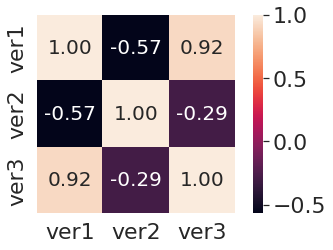

In [39]:
# 레이블의 폰트 사이즈를 조정
sns.set(font_scale=2.0)

test_heatmap = sns.heatmap(corr.values, # 데이터
                           cbar = True, # 오른쪽 컬러 막대 출력 여부
                           annot = True, # 차트에 숫자를 보여줄 것인지 여부
                           annot_kws={'size' : 20}, # 숫자 출력 시 숫자 크기 조절
                           fmt = '.2f', # 숫자의 출력 소수점자리 개수 조절
                           square = True, # 차트를 정사각형으로 할 것인지
                          yticklabels=column_names, # x축에 컬럼명 출력
                          xticklabels=column_names) # y축에 컬럼명 출력
plt.tight_layout() #그래프 간격 유지 설정
plt.show() 

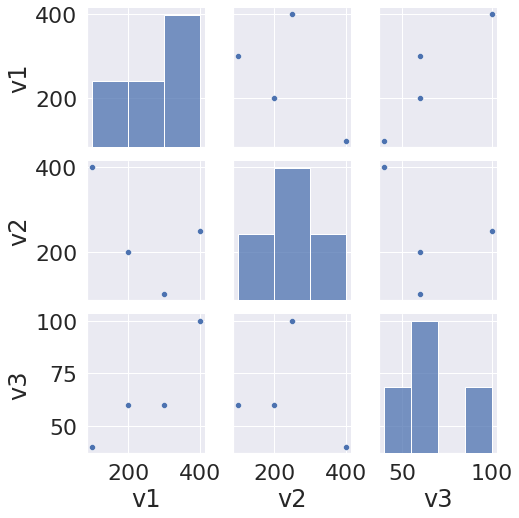

In [41]:
sns.pairplot(test_df) #산점도는 데이터 전체를 넣어야 함
plt.show()

In [44]:
corr=drink_df[['beer_servings', 'wine_servings']].corr(method='pearson')
corr

,beer_servings,wine_servings
beer_servings,1.000000,0.527172
wine_servings,0.527172,1.000000


In [47]:
cols=['beer_servings','spirit_servings','wine_servings', 'total_litres_of_pure_alcohol']
corr = drink_df[cols].corr(method ='pearson')
corr

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.458819,0.527172,0.835839
spirit_servings,0.458819,1.000000,0.194797,0.654968
wine_servings,0.527172,0.194797,1.000000,0.667598
total_litres_of_pure_alcohol,0.835839,0.654968,0.667598,1.000000


In [48]:
corr.values

array([[1.        , 0.45881887, 0.52717169, 0.83583863],
       [0.45881887, 1.        , 0.19479705, 0.65496818],
       [0.52717169, 0.19479705, 1.        , 0.66759834],
       [0.83583863, 0.65496818, 0.66759834, 1.        ]])

In [52]:
column_name = ['beer', 'spirit','wine','alcohol']

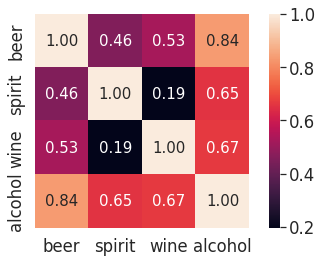

In [53]:
# 레이블의 폰트 사이즈를 조정
sns.set(font_scale=1.5)

hm = sns.heatmap(corr.values, # 상관계수 데이터
            cbar=True,
            annot=True, 
            square=True,
            fmt='.2f',
            annot_kws={'size': 15},
            yticklabels=column_name,
            xticklabels=column_name)

plt.tight_layout()
plt.show()

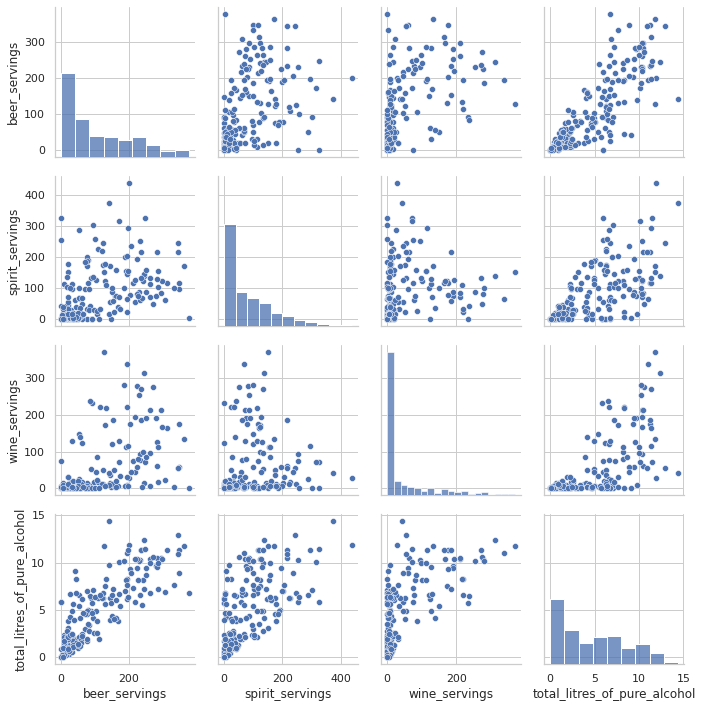

In [51]:
# 시각화 라이브러리를 이용한 피처간의 scatter plot을 출력합니다.
sns.set(style='whitegrid')

sns.pairplot(drink_df[['beer_servings', 'spirit_servings', 
                     'wine_servings', 'total_litres_of_pure_alcohol']])
plt.show()

In [ ]:
drink_df['continent'] = drink_df['continent'].fillna('ETC') # 빈 값에 ETC라고 채우기
drink_df[(drink_df['continent']=='ETC')]

In [59]:
drink_df['continent'].value_counts() # 열이 한개면 Series 이다/ index + value 형태

AF     53
EU     45
AS     44
ETC    23
OC     16
SA     12
Name: continent, dtype: int64

In [60]:
pie_labels=drink_df['continent'].value_counts().index.tolist() #라벨을 리스트로 변환해서 저장
#index 는 왼쪽에 있는 값들을 뽑아내는 역할

In [62]:
pie_values = drink_df['continent'].value_counts().values.tolist()
#values는 오른쪽 숫자값들을 뽑아내는 역할

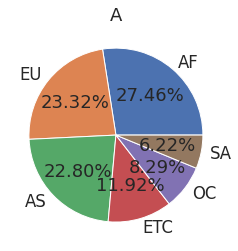

In [65]:
plt.pie(pie_values, labels=pie_labels, autopct='%.2f%%')
plt.title('A')
plt.show()

Groupby 분석

In [67]:
drink_df.groupby('continent')['beer_servings'].mean()

continent
AF      61.471698
AS      37.045455
ETC    145.434783
EU     193.777778
OC      89.687500
SA     175.083333
Name: beer_servings, dtype: float64

In [68]:
drink_df.groupby('continent').mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
ETC,145.434783,165.739130,24.521739,5.995652
EU,193.777778,132.555556,142.222222,8.617778
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


총 알코올 소비량 평균보다 더 많이 알콜을 섭취하는 대륙은?

In [70]:
total_mean = drink_df.total_litres_of_pure_alcohol.mean()
total_mean

4.717098445595855

In [72]:
continent_mean = drink_df.groupby('continent')['total_litres_of_pure_alcohol'].mean()
print(continent_mean)

continent
AF     3.007547
AS     2.170455
ETC    5.995652
EU     8.617778
OC     3.381250
SA     6.308333
Name: total_litres_of_pure_alcohol, dtype: float64


In [74]:
continent_over_mean = continent_mean[continent_mean >= total_mean]
print(continent_over_mean)

continent
ETC    5.995652
EU     8.617778
SA     6.308333
Name: total_litres_of_pure_alcohol, dtype: float64


평균 와인 소비량이 가장 높은 대륙은?

In [76]:
drink_df.groupby('continent')['wine_servings'].mean().idxmax()

'EU'

In [77]:
drink_df.groupby('continent')['wine_servings'].agg(['mean','max','min','sum'])

,mean,max,min,sum
continent,,,,
AF,16.264151,233,0,862
AS,9.068182,123,0,399
ETC,24.521739,100,1,564
EU,142.222222,370,0,6400
OC,35.625000,212,0,570
SA,62.416667,221,1,749


막대그래프

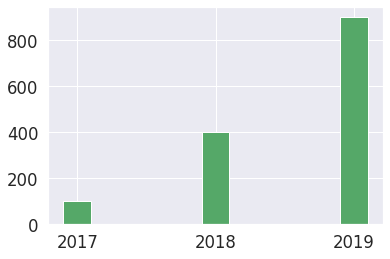

In [78]:
# 여기서 index 값인 0, 1, 2는 순차적으로 어디에 배치될 것인지를 의미합니다.
# 어떤 의미인지 궁금하다면 0, 1, 5로 바꿔서 실행해보세요!

index = [0, 1, 2]
years = ['2017', '2018', '2019']
values = [100, 400, 900]

plt.bar(index, values, width=0.2, color='g')
plt.xticks(index, years)
plt.show()

In [79]:
import numpy as np

np.arange(3)  #인덱스 개수 설정할때 쓰임.

array([0, 1, 2])

In [81]:
beer_servings_table = drink_df.groupby('continent').beer_servings.agg(['mean', 'min', 'max', 'sum'])

In [82]:
beer_servings_table.index.tolist()

['AF', 'AS', 'ETC', 'EU', 'OC', 'SA']

In [83]:
beer_servings_table['mean'].tolist()

[61.471698113207545,
 37.04545454545455,
 145.43478260869566,
 193.77777777777777,
 89.6875,
 175.08333333333334]

In [85]:
index = np.arange(len(beer_servings_table.index.tolist()))
index

array([0, 1, 2, 3, 4, 5])

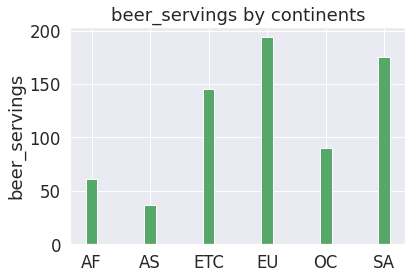

In [92]:
continents = beer_servings_table.index.tolist()
values = beer_servings_table['mean'].tolist()

plt.ylabel('beer_servings')
plt.title('beer_servings by continents')
plt.bar(index,values,width=0.2, color='g')
plt.xticks(index, continents)
plt.show()